#Transfer Learning ( Transfer Learning is technique that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. )


1.   Feature Extraction
2.   Fine Tuning



In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 28.8MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.4MB/s]


In [7]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [9]:
conv_base= VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3)
                 )

58889256/58889256 [==============================] - 2s 0us/step


In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
from keras.utils import plot_model

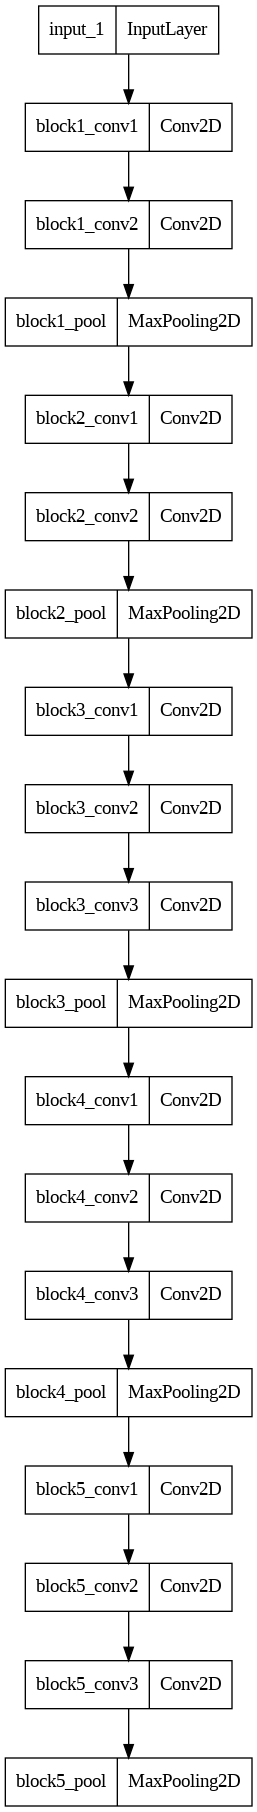

In [12]:
plot_model(conv_base)

In [13]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


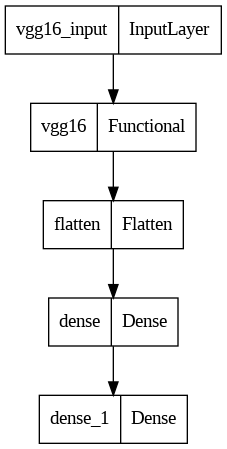

In [15]:
plot_model(model)

In [16]:
conv_base.trainable=False

In [17]:
# Generators
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
# Normalize
def process(image,label):
  image= tensorflow.cast(image/255, tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 67s 92ms/step - loss: 0.2691 - accuracy: 0.8859 - val_loss: 0.2136 - val_accuracy: 0.9092
Epoch 2/5
625/625 [==============================] - 69s 110ms/step - loss: 0.1909 - accuracy: 0.9198 - val_loss: 0.2171 - val_accuracy: 0.9064
Epoch 3/5
625/625 [==============================] - 61s 97ms/step - loss: 0.1576 - accuracy: 0.9355 - val_loss: 0.2104 - val_accuracy: 0.9148
Epoch 4/5
625/625 [==============================] - 59s 94ms/step - loss: 0.1353 - accuracy: 0.9446 - val_loss: 0.3244 - val_accuracy: 0.8742
Epoch 5/5
625/625 [==============================] - 58s 92ms/step - loss: 0.1105 - accuracy: 0.9560 - val_loss: 0.2404 - val_accuracy: 0.9140


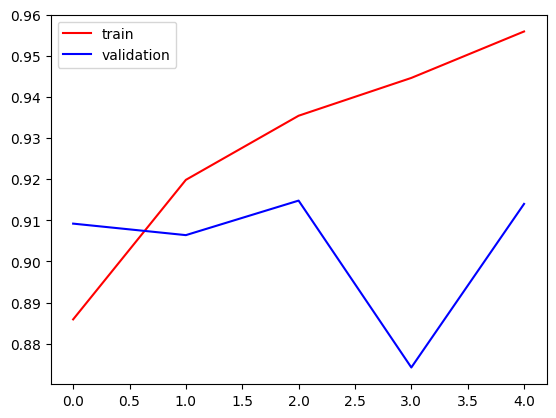

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

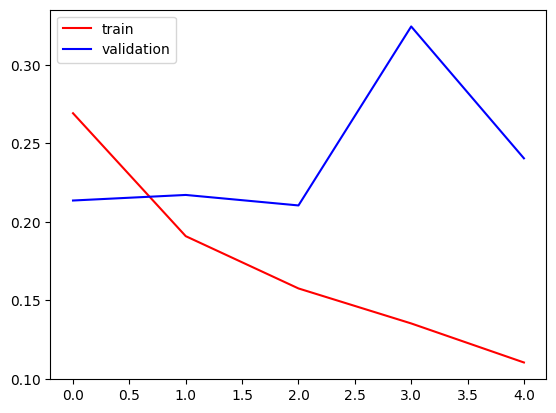

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#Fine Tuinning (Where some convolutional layers also get trained.)

In [23]:
conv_base_2= VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3)
                 )

In [26]:
conv_base_2.trainable=True

set_trainable= False

for layer in conv_base_2.layers:
  if layer.name=='block5_conv1':
    set_trainable= True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base_2.layers:
  print(layer.name, layer.trainable)


input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [27]:
conv_base_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [28]:
model_2=Sequential()

model_2.add(conv_base_2)
model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [30]:
model_2.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [31]:
history=model_2.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 81s 125ms/step - loss: 0.2396 - accuracy: 0.8963 - val_loss: 0.2090 - val_accuracy: 0.9136
Epoch 2/5
625/625 [==============================] - 68s 108ms/step - loss: 0.1329 - accuracy: 0.9481 - val_loss: 0.1404 - val_accuracy: 0.9440
Epoch 3/5
625/625 [==============================] - 76s 121ms/step - loss: 0.0953 - accuracy: 0.9641 - val_loss: 0.1265 - val_accuracy: 0.9512
Epoch 4/5
625/625 [==============================] - 67s 106ms/step - loss: 0.0683 - accuracy: 0.9762 - val_loss: 0.1497 - val_accuracy: 0.9436
Epoch 5/5
625/625 [==============================] - 76s 121ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.1254 - val_accuracy: 0.9526


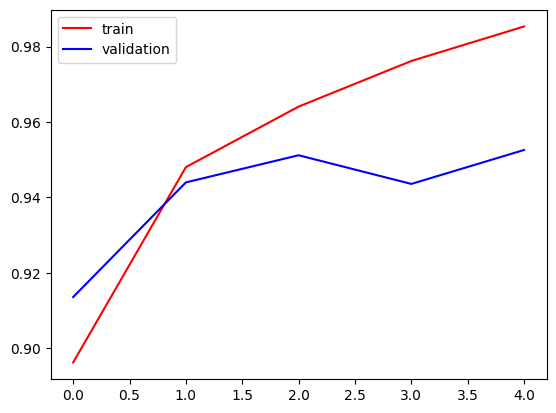

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

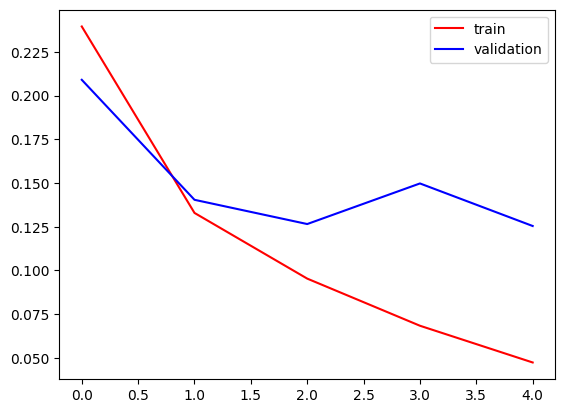

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()